<center>
  <h1><b>Understanding Data frames - merge</b></h1>
</center>

In [1]:
#we import pandas library to manipulate data
import pandas as pd


In [2]:
#we load datasets and print the head to see how they look like
cash_request_df = pd.read_csv('extract - cash request - data analyst.csv')
fees_df = pd.read_csv('extract - fees - data analyst - .csv')

display(cash_request_df.head())
display(fees_df.head())
#We can see that are columns with the same name but different meaning, so if we want to merge everything, we have to change columns names accordingly

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [3]:
#by looking at the data, looks like we have one dataframe with users and cash requests and then another dataframe with the corresponding fee, let's look at first example:
cash_request_df[cash_request_df['id'] == 14941.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
9954,14941,100.0,direct_debit_rejected,2020-09-07 10:46:57.780263+00,2020-12-20 22:40:42.540135+00,35661.0,NaN,NaN,2020-10-01 22:00:00+00,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00


In [4]:
#Because we have same column names in both dataframes but different meaning, let's check what are the repeated column names and change their names 
repeated_columns = list(set(cash_request_df.columns) & set(fees_df.columns))
repeated_columns

['created_at', 'id', 'updated_at', 'status']

In [5]:
#Because we have same column names in both dataframes but different meaning, let's check what are the repeated column names and change their names 
repeated_columns = list(set(cash_request_df.columns) & set(fees_df.columns))
repeated_columns

['created_at', 'id', 'updated_at', 'status']

In [6]:
# Rename repeated columns in cash_request_df
cash_request_df.rename(columns={col: f"CR_{col}" for col in repeated_columns}, inplace=True)
# Rename repeated columns in fees_df
fees_df.rename(columns={col: f"F_{col}" for col in repeated_columns}, inplace=True)

display(cash_request_df.head())
display(fees_df.head())

,CR_id,amount,CR_status,CR_created_at,CR_updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,F_id,cash_request_id,type,F_status,category,total_amount,reason,F_created_at,F_updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [7]:
#let's also change the name of cash_request_id to CR_id so they have the same column name in both dataset as it is the same unique values
fees_df.rename(columns={'cash_request_id': 'CR_id'}, inplace=True)

display(cash_request_df.head())
display(fees_df.head())

,CR_id,amount,CR_status,CR_created_at,CR_updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,F_id,CR_id,type,F_status,category,total_amount,reason,F_created_at,F_updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [8]:
#we are going to merge them now but before merging let's print dimensions of dataset to check later that merging makes sense
print(cash_request_df.shape)
print(fees_df.shape)


(23970, 16)
(21061, 13)


In [9]:
#now let's merge so we have all cash requests and their fees
merged_df = pd.merge(left = cash_request_df, right = fees_df, left_on = 'CR_id', right_on = 'CR_id', how = 'left')

print(merged_df.shape)
merged_df.sample(10)


(32094, 28)


,CR_id,amount,CR_status,CR_created_at,CR_updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,F_status,category,total_amount,reason,F_created_at,F_updated_at,paid_at,from_date,to_date,charge_moment
18917,13468,100.0,money_back,2020-08-21 10:25:21.692629+00,2020-12-18 13:10:20.330012+00,16364.0,NaN,NaN,2020-09-07 22:00:00+00,2020-08-22,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:52:23.976761+00,2020-10-13 14:25:02.439552+00,2020-10-23 00:55:52.54596+00,NaN,NaN,after
15076,5019,100.0,money_back,2020-06-24 17:50:08.845421+00,2020-12-18 13:09:20.778569+00,NaN,2020-06-25 11:46:44.27837+00,19333.0,2020-09-04 22:00:00+00,2020-06-27,...,cancelled,NaN,5.0,Postpone Cash Request 5019,2020-08-03 13:36:11.966826+00,2020-10-13 14:25:16.385605+00,NaN,2020-08-05 22:00:00+00,2020-09-04 22:00:00+00,after
5456,3901,100.0,direct_debit_rejected,2020-06-18 11:03:25.776865+00,2020-08-29 22:41:57.053154+00,17343.0,2020-06-18 14:31:34.97354+00,NaN,2020-07-05 22:00:00+00,2020-06-22,...,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 23:02:45.522119+00,2020-10-13 14:25:02.661163+00,NaN,NaN,NaN,after
5911,2220,100.0,money_back,2020-05-27 15:42:08.386331+00,2020-09-15 06:52:54.992191+00,4904.0,2020-05-28 09:19:42.273218+00,NaN,2020-07-30 22:00:00+00,2020-05-29,...,cancelled,NaN,5.0,Postpone Cash Request 2220,2020-06-23 08:20:49.68538+00,2020-10-13 14:25:14.87653+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
13843,5061,100.0,money_back,2020-06-24 23:28:19.010524+00,2020-12-18 13:09:05.913573+00,20434.0,2020-06-25 12:26:09.850009+00,NaN,2020-07-06 23:51:00+00,2020-06-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29979,17350,100.0,money_back,2020-09-22 19:53:00.619979+00,2020-12-18 13:13:48.049418+00,18779.0,NaN,NaN,2020-10-16 19:53:00.583154+00,2020-09-25,...,accepted,NaN,5.0,Instant Payment Cash Request 17350,2020-09-22 19:53:18.237274+00,2020-10-13 14:25:13.145248+00,2020-11-06 13:05:48.965602+00,NaN,NaN,after
2790,13330,100.0,direct_debit_rejected,2020-08-20 11:08:27.089725+00,2020-09-21 22:46:09.979933+00,33064.0,NaN,NaN,2020-09-07 22:00:00+00,2020-08-22,...,rejected,NaN,5.0,Instant Payment Cash Request 13330,2020-08-20 11:08:50.679177+00,2020-10-13 14:25:02.372047+00,2020-09-16 11:03:26.301122+00,NaN,NaN,after
14828,5736,100.0,money_back,2020-06-29 07:08:52.284432+00,2020-12-18 13:09:17.088858+00,24561.0,2020-06-29 11:45:07.991178+00,NaN,2020-08-13 05:51:00.057+00,2020-07-01,...,accepted,NaN,5.0,Postpone Cash Request 5736,2020-07-29 05:51:02.24345+00,2020-10-13 14:25:02.701714+00,2020-07-29 05:51:05.997425+00,2020-08-02 22:00:00+00,2020-08-13 05:51:00.057+00,before
12659,7006,100.0,direct_debit_rejected,2020-07-07 20:28:06.336251+00,2020-12-18 22:46:10.619917+00,16989.0,2020-07-08 13:32:11.407955+00,NaN,2020-08-05 22:00:00+00,2020-07-09,...,cancelled,NaN,5.0,Postpone Cash Request 7006,2020-07-15 16:36:26.170667+00,2020-10-13 14:25:16.3191+00,NaN,2020-08-05 22:00:00+00,2020-08-20 22:00:00+00,after
1178,2093,100.0,money_back,2020-05-21 10:26:53.7626+00,2020-06-14 04:13:57.547324+00,9362.0,2020-05-21 11:31:10.996269+00,NaN,2020-06-13 22:00:00+00,2020-05-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#this makes sense? we have that the length of merged is greater thatn the length of cash requests, which means we have charque requests ids with more than one fee? could we have some null values?
merged_df.isnull().sum()

CR_id                             0
amount                            0
CR_status                         0
CR_created_at                     0
CR_updated_at                     0
user_id                        2572
moderated_at                  10335
deleted_account_id            29521
reimbursement_date                0
cash_request_received_date     7945
money_back_date                8177
transfer_type                     0
send_at                        9416
recovery_status               24894
reco_creation                 24894
reco_last_update              24894
F_id                          11037
type                          11037
F_status                      11037
category                      29898
total_amount                  11037
reason                        11037
F_created_at                  11037
F_updated_at                  11037
paid_at                       16563
from_date                     24328
to_date                       24328
charge_moment               

In [11]:
#looks like there are charge requests with no fees which makes sense, but let's check if the size of the merged_df is justified by checking if a cash request could have more than one fee
CR_multiple_fees = merged_df.groupby('CR_id')['F_id'].nunique().reset_index()
CR_multiple_fees.sample(10)

,CR_id,F_id
2259,2415,0
15007,17472,4
1473,1556,1
16142,18652,1
11676,13940,2
22985,25926,1
9890,11966,0
17226,19810,2
22095,24980,1
12552,14877,1


In [12]:
#for now we dont want to clean any data because the meaning of NaN makes sense in the colums, depending on the info we wanna get.

<center>
  <h1><b>METRICS TO ANALYZE</b></h1>
</center>

<span style="font-size:22px;">Frequency of Service Usage</span>

In [13]:
#we need to group data by userid, userdid and then count the number of cash requests over a period: daily, monthly and yearly. But first, we need to convert created_at column to datetime
merged_df['CR_created_at'] = pd.to_datetime(merged_df['CR_created_at'])

,CR_creation_date,CR_id_count
0,2019-11-19,1
1,2019-12-09,1
2,2019-12-10,18
3,2019-12-11,22
4,2019-12-12,25


,CR_id_count
count,330.000000
mean,97.254545
std,115.399038
min,1.000000
25%,9.000000
50%,38.000000
75%,165.250000
max,694.000000


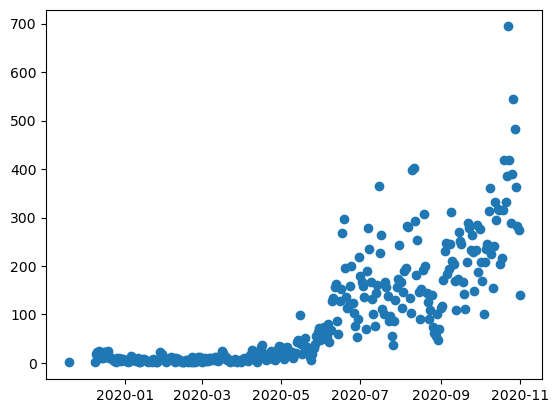

In [14]:
#lets create a new column called CR_creation_date to get just the date and ease filtering later
merged_df['CR_creation_date'] = merged_df['CR_created_at'].dt.date

daily_service_usage = merged_df.groupby(['CR_creation_date'])['CR_id'].count().reset_index()
daily_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(daily_service_usage.head())
display(daily_service_usage.describe())

#this is just the number of uses by dates but we could do the number of uses by users per day

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(daily_service_usage['CR_creation_date'],daily_service_usage['CR_id_count'])
plt.show()

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_43012\2509116887.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_id_count
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244


,CR_id_count
count,13.000000
mean,2468.769231
std,3126.816063
min,1.000000
25%,223.000000
50%,473.000000
75%,4793.000000
max,9611.000000


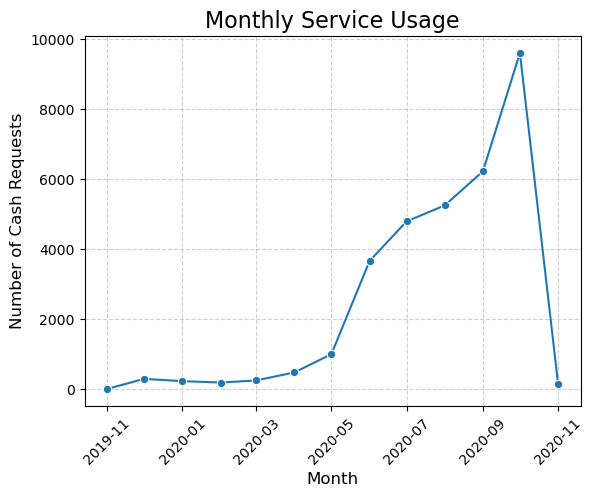

In [18]:
#now we create another extra column for the month, we will filter by month later
merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')
monthly_service_usage = merged_df.groupby(['CR_creation_month'])['CR_id'].count().reset_index()
monthly_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(monthly_service_usage.head())
display(monthly_service_usage.describe())

import matplotlib.pyplot as plt
import seaborn as sns

#we change the datatype so we can represent it on x axis
monthly_service_usage['CR_creation_month'] = monthly_service_usage['CR_creation_month'].dt.to_timestamp()

sns.lineplot(data=monthly_service_usage, x='CR_creation_month', y='CR_id_count', marker='o')
plt.title("Monthly Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<span style="font-size:22px;">Incident Rate</span>